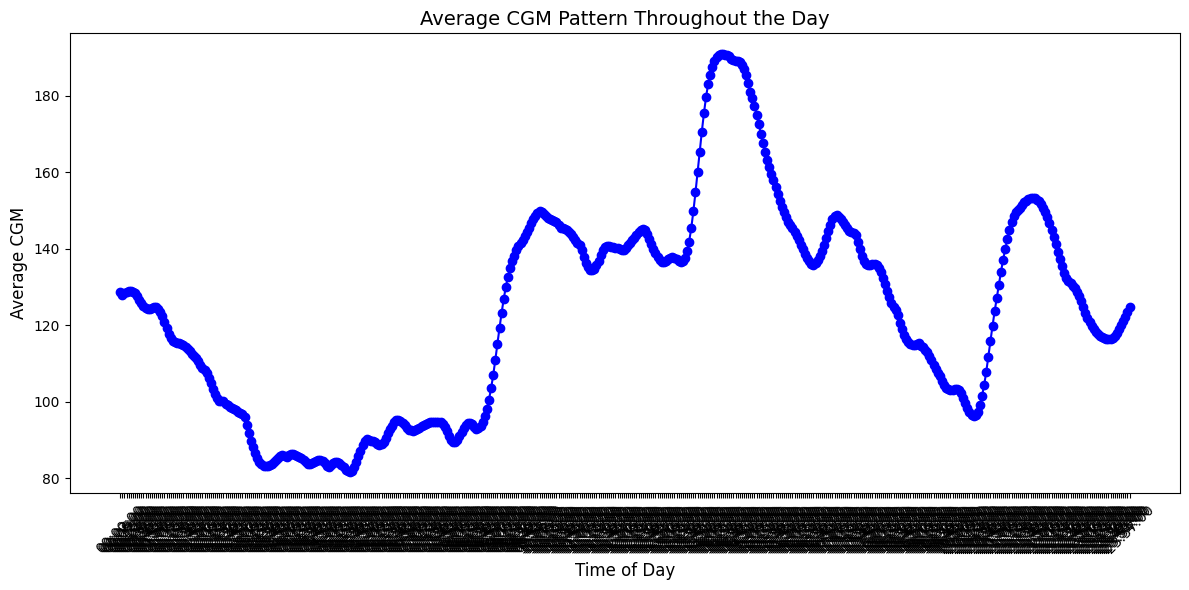

In [119]:
import pandas as pd
df = pd.read_csv('/Users/danasour/PycharmProjects/GLUSAP/notebooks/results/adult#001.csv')
df['Time'] = pd.to_datetime(df['Time'])


df['Time_of_Day'] = df['Time'].dt.time


average_cgm = df.groupby('Time_of_Day')['CGM'].mean()

average_cgm_df = average_cgm.reset_index()

import matplotlib.pyplot as plt

average_cgm_df['Time_of_Day'] = average_cgm_df['Time_of_Day'].astype(str)

plt.figure(figsize=(12, 6))
plt.plot(average_cgm_df['Time_of_Day'], average_cgm_df['CGM'], marker='o', linestyle='-', color='blue')

plt.xticks(rotation=45, fontsize=10)
plt.xlabel('Time of Day', fontsize=12)
plt.ylabel('Average CGM', fontsize=12)
plt.title('Average CGM Pattern Throughout the Day', fontsize=14)

plt.tight_layout()
plt.show()


In [116]:
average_cgm_df

,Time_of_Day,CGM
0,00:00:00,128.615651
1,00:03:00,127.857316
2,00:06:00,128.372019
3,00:09:00,128.776979
4,00:12:00,129.018873
...,...,...
475,23:45:00,120.053336
476,23:48:00,121.162826
477,23:51:00,122.337775
478,23:54:00,123.565458


In [108]:
import pandas as pd
df = pd.read_csv('/Users/danasour/PycharmProjects/GLUSAP/notebooks/results/adult#001.csv')
df['Time'] = pd.to_datetime(df['Time'])

In [114]:

df['hour'] = df['Time'].dt.hour
df['event'] = df['hour'].apply(lambda x: 'nit' if (x >= 22 or x < 6) else 'dia')

df['subsequence'] = (df['CHO'] > 0).cumsum()  # Cambia cuando hay ingesta de CHO
df['subsequence'] = df.apply(
    lambda row: f"nit_{row['subsequence']}" if row['event'] == 'nit' else f"apat_{row['subsequence']}",
    axis=1
)

# Dividir en subsecuencias
subsequences = {key: group for key, group in df.groupby('subsequence')}


subsequences = dict(sorted(subsequences.items(), key=lambda x: x[1].iloc[0]['Time']))

sequences_with_next = []

for i, (key, subseq) in enumerate(subsequences.items()):
    if i + 1 < len(subsequences):  # Si no es la última subsecuencia
        next_subseq = subsequences[list(subsequences.keys())[i + 1]]  
        sequences_with_next.append((subseq[['CGM']], next_subseq[['CGM']]))  

In [110]:
import numpy as np
import matplotlib.pyplot as plt
from tslearn.clustering import TimeSeriesKMeans
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

first_sequences = [subseq['CGM'].values for subseq in subsequences.values()]

max_len = max(len(seq) for seq in first_sequences)

first_sequences_padded = [
    np.pad(seq, (0, max_len - len(seq)), mode='constant', constant_values=0)  # Padding con ceros
    for seq in first_sequences
]


In [111]:
first_sequences_normalized = scaler.fit_transform([seq for seq in first_sequences_padded])
first_sequences_normalized


# Aplicar TimeSeriesKMeans con DTW
n_clusters = 4
modelo = TimeSeriesKMeans(n_clusters=n_clusters, metric="dtw", max_iter=10, random_state=42)
clusters = modelo.fit_predict(first_sequences_normalized)

In [88]:
subseq[1
]

,CGM
120,151.498091
121,149.072309
122,146.388715
123,143.937740
124,142.163447
125,141.231677
126,140.890943
127,140.797019
128,140.605677
129,140.004742


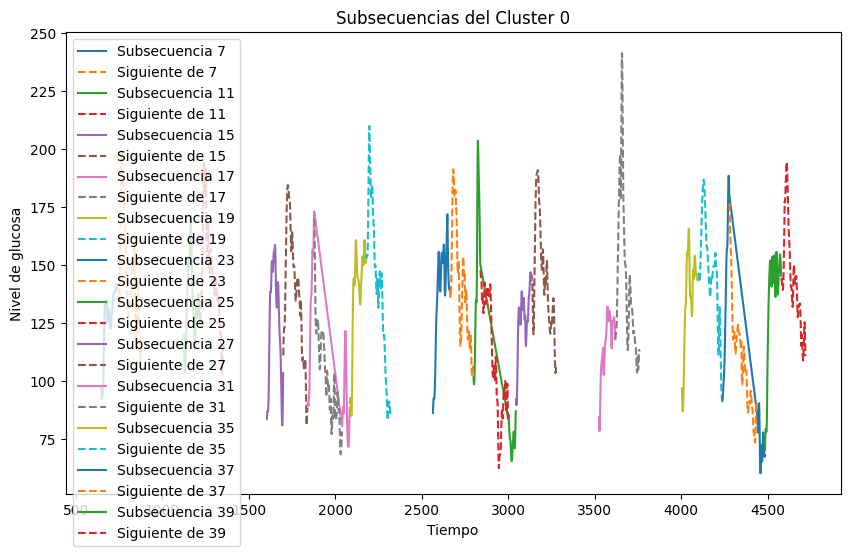

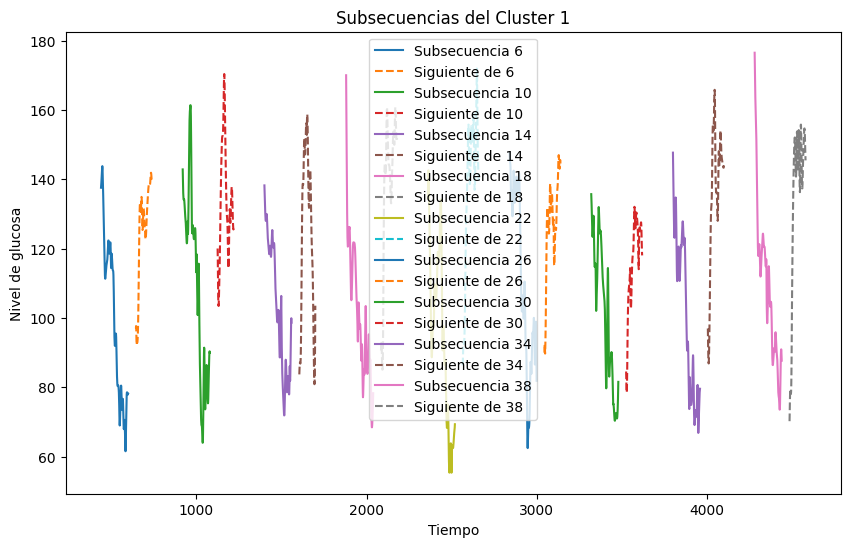

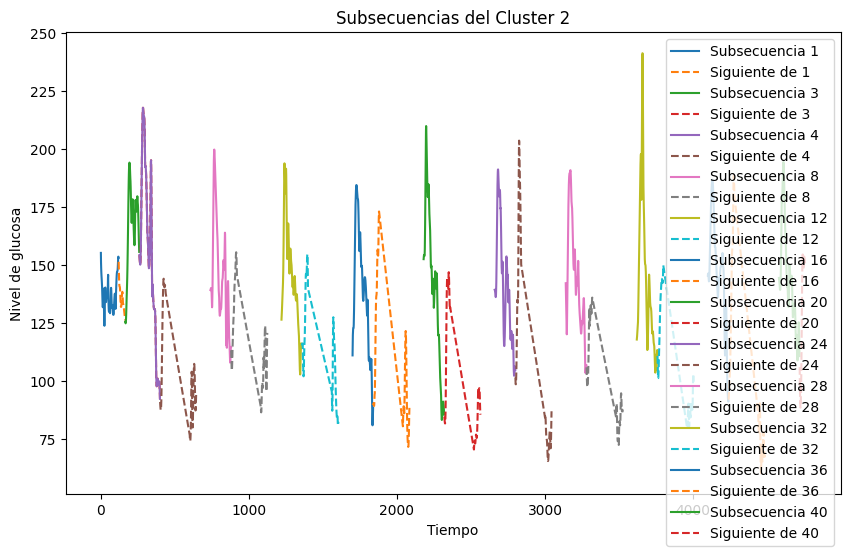

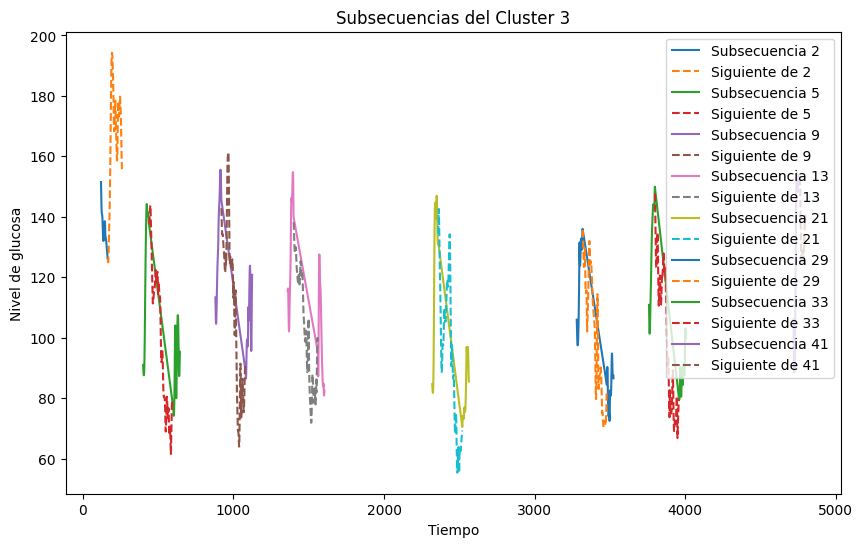

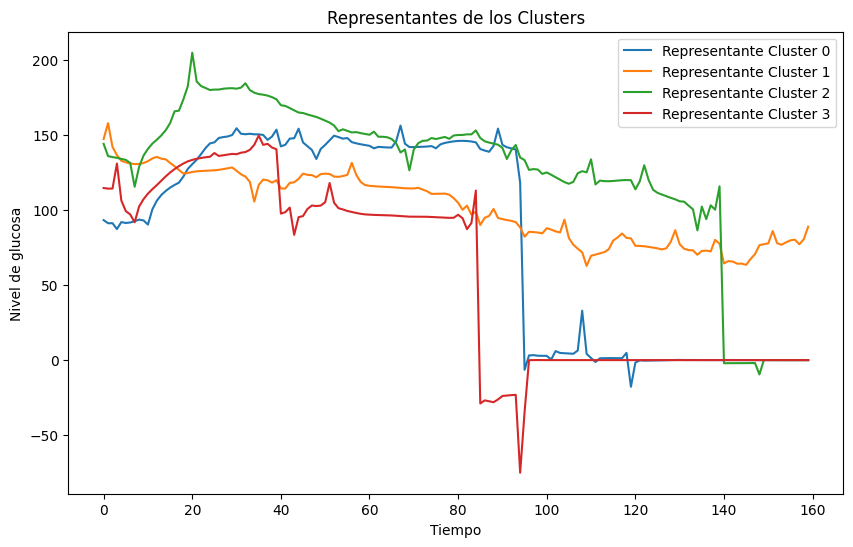

In [112]:
for cluster_id in range(n_clusters):
    plt.figure(figsize=(10, 6))
    for i, subseq in enumerate(sequences_with_next):
        if clusters[i] == cluster_id:  
            plt.plot(subseq[0], label=f'Subsecuencia {i+1}')
            next_seq = subseq[1] 
            
            if len(next_seq) > 0: 
                plt.plot(next_seq, label=f'Siguiente de {i+1}', linestyle='--')  
    plt.title(f'Subsecuencias del Cluster {cluster_id}')
    plt.xlabel('Tiempo')
    plt.ylabel('Nivel de glucosa')
    plt.legend()
    plt.show()

plt.figure(figsize=(10, 6))
for i, centro in enumerate(modelo.cluster_centers_):
    centro_original = scaler.inverse_transform(centro.reshape(1, -1)).flatten()
    plt.plot(centro_original, label=f'Representante Cluster {i}')
plt.title('Representantes de los Clusters')
plt.xlabel('Tiempo')
plt.ylabel('Nivel de glucosa')
plt.legend()
plt.show()


In [96]:
centro

array([[-0.71394504],
       [-1.06464981],
       [-1.04363693],
       [-1.11217141],
       [-0.27024412],
       [-0.96126423],
       [-0.98681941],
       [-0.99309083],
       [-1.01762191],
       [-1.19819944],
       [-2.35835732],
       [-1.3468028 ],
       [-1.02973099],
       [-0.89976742],
       [-0.87121384],
       [-0.87125924],
       [-0.87812793],
       [-0.86055103],
       [-0.78181445],
       [-0.63307846],
       [-0.52940985],
       [-0.47646262],
       [-0.45800528],
       [-0.45800528],
       [-0.45800528],
       [-0.45800528],
       [-0.45800528],
       [-0.45800528],
       [-0.45800528],
       [-0.45800528],
       [-0.41173953],
       [-0.46058196],
       [-0.46170746],
       [-0.46170746],
       [-0.46170746],
       [-0.46170746],
       [-0.4619081 ],
       [-0.463866  ],
       [-0.562878  ],
       [-0.46423397],
       [-0.46071644],
       [-0.46071644],
       [-0.46071644],
       [-0.46071644],
       [-0.46071644],
       [-0

In [32]:
first_sequences_normalized

array([[ 1.09903317,  1.0666112 ,  1.0194733 , ..., -0.51758241,
        -0.51847898, -0.51923787],
       [ 0.13812395,  0.15293513,  0.1826647 , ..., -0.51758241,
        -0.51847898, -0.51923787],
       [-1.41543427, -1.37892489, -1.3304577 , ..., -0.51758241,
        -0.51847898, -0.51923787],
       ...,
       [ 1.09675345,  1.17856199,  1.2470969 , ..., -0.51758241,
        -0.51847898, -0.51923787],
       [ 0.77899368,  0.7278818 ,  0.6867458 , ...,  2.09613196,
         2.11290701,  2.11398454],
       [ 0.60791599,  0.58661498,  0.56553024, ...,  2.35908521,
         2.39083977,  2.36724149]])